In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path_dataset2 = "./dataset/albumlist.csv"
dataset = pd.read_csv(path_dataset2)

In [4]:
genres_list = dataset['Genre'].value_counts()
count_map = {}
for genres in genres_list.keys():
    count = genres_list[genres]
    genres = genres.strip()
    split_genres = genres.split(',')
    for genre in split_genres:
        genre = genre.strip(" & ")
        if genre in count_map.keys():
            count_map[genre] = count_map[genre] + count
        else:
            count_map[genre] = count
count_map = dict(sorted(count_map.items(), key=lambda item: item[1], reverse=True))



In [5]:
import plotly.express as px

# Create a new DataFrame to store the data for the plot
data = []

# Specify the order of genres
all_genres = ["Rock","Funk / Soul","Pop","Electronic"]

# Loop over each decade
for start_year in range(1960, 2001, 10):
    end_year = start_year + 9
    filtered_dataset = dataset[(dataset['Year'] >= start_year) & (dataset['Year'] <= end_year)]
    genre_albums = {genre: 0 for genre in all_genres}
    counts = filtered_dataset['Genre'].value_counts()
    for genres in counts.index:
        count = counts[genres]
        genres = genres.strip()
        split_genres = genres.split(',')
        for genre in split_genres:
            genre = genre.strip(" & ")
            if genre in genre_albums:
                genre_albums[genre] += count
    for genre, count in genre_albums.items():
        data.append({'Decade': str(start_year) + 's', 'Genre': genre, 'Number of Albums': count})

# Convert the data to a DataFrame
df = pd.DataFrame(data)
df = df[df['Genre'].isin(all_genres)]
# Create the animated bar chart
fig = px.bar(df, x='Number of Albums', y='Genre', animation_frame='Decade', orientation='h', 
             range_x=[0, df['Number of Albums'].max()], 
             category_orders={'Genre': all_genres})

# Show the plot
fig.show()

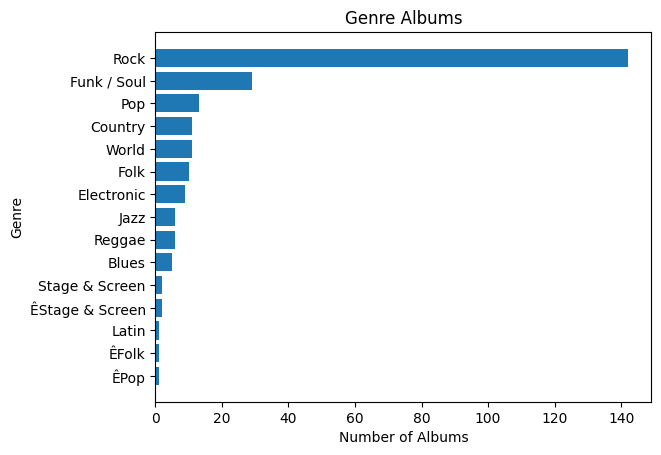

In [14]:
# initialize a dictionary to store the number of albums for each genre
# Take input for the decade
decade = input("Enter the decade (e.g., 1960s, 1970s, 1980s, 1990s, 2000s): ")

# Extract the start and end years from the input decade
start_year = int(decade[:4])
end_year = int(decade[:3] + "9")

# Filter the dataset based on the start and end years
filtered_dataset = dataset[(dataset['Year'] >= start_year) & (dataset['Year'] <= end_year)]

genre_albums = {}
counts = filtered_dataset['Genre'].value_counts()
for genres in counts.index:
    # split the genres string by ','
    count = counts[genres]
    genres = genres.strip()
    split_genres = genres.split(',')
    
    for genre in split_genres:
        genre = genre.strip(" & ")
        # if the genre is not in the dictionary, add it with the count
        if genre not in genre_albums:
            genre_albums[genre] = count
        # if the genre is already in the dictionary, add the count to the existing count
        else:
            genre_albums[genre]= genre_albums[genre] + count

# Sort the dictionary by the number of albums
sorted_genre_albums = sorted(genre_albums.items(), key=lambda x: x[1], reverse=False)
# Extract the genres and counts from the sorted dictionary
genres = [genre for genre, count in sorted_genre_albums]
counts = [count for genre, count in sorted_genre_albums]

# Plot the histogram with horizontal bars
plt.barh(range(len(genres)), counts)
plt.ylabel('Genre')
plt.xlabel('Number of Albums')
plt.title('Genre Albums')

# Set the y-axis labels to the genres
plt.yticks(range(len(genres)), genres)

# Show the plot
plt.show()
